<a href="https://colab.research.google.com/github/m4maad/ia2/blob/main/T2_IA2_2023_MarcoMaron_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho prático IA2**

**Criando o Perceptron**

In [139]:
#Atividade de 1 a 4 - Inicializa os Pesos e Bias, Defina as funções de treinamento, Calcule o output do perceptron, Crie uma função simples para calcular acurácia
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, alpha=0.1, epochs=10):
        np.random.seed(1)
        self.alpha = alpha
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = 2 * np.random.rand(n_features) - 1
        self.bias = 2 * np.random.rand() - 1

        for epoch in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):
                y_pred = self.predict(x_i)
                erro = y_esperado - y_pred
                self.weights += self.alpha * erro * x_i
                self.bias += self.alpha * erro

    def predict(self, X):
        signal = np.dot(X, self.weights) + self.bias
        output = self.activation(signal)
        return output

    def activation(self, signal):
        return np.where(signal >= 0, 1, 0)

def accuracy(y_true, y_pred):
    hits = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            hits += 1
    result = hits / len(y_true)
    return result

# Exemplo de uso do Perceptron
if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 0, 0, 1])

    perceptron = Perceptron(alpha=0.1, epochs=10)
    perceptron.fit(X, Y)
    predictions = [perceptron.predict(x) for x in X]

    accuracy_value = accuracy(Y, predictions)
    print("Acurácia:", accuracy_value)

Acurácia: 1.0


Perceptron classification accuracy: 1.0


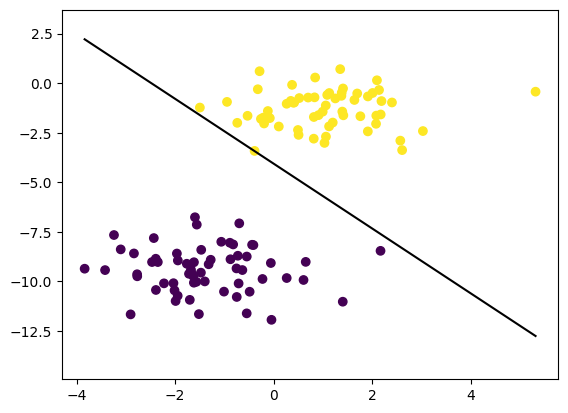

In [140]:
#Atividade de 1 a 4 - Inicialize os Pesos e Bias, Defina as funções de treinamento, Calcule o output do perceptron, Crie uma função simples para calcular acurácia (testando de outra forma)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Classe Perceptron
class Perceptron:

  def __init__(self, alpha=0.1, epochs=10):
    np.random.seed(1)
    self.alpha = alpha
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, X, Y):
    n_samples, n_features = X.shape
    # Atividade 1: Inicialize os Pesos e Bias
    self.weights = 2 * np.random.rand(n_features) - 1
    self.bias = 2 * np.random.rand() - 1

    for epoch in range(self.epochs):
      for x_i, y_esperado in zip(X, Y):
        # Atividade 2: Defina as funções de treinamento
        y_pred = self.predict(x_i)
        erro = y_esperado - y_pred
        self.weights += self.alpha * erro * x_i
        self.bias += self.alpha * erro

  def predict(self, X):
    # Atividade 3: Calcule o output do perceptron
    signal = np.dot(X, self.weights) + self.bias
    output = self.activation(signal)
    return output

  def activation(self, signal):
    return np.where(signal >= 0, 1, 0)

# Função para calcular a acurácia (Atividade 4)
def accuracy(y_true, y_pred):
    hits = np.sum(y_true == y_pred)
    result = hits / len(y_true)
    return result

# Geração de dados de exemplo e separação em treinamento e teste
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# Treinamento e avaliação do perceptron
p = Perceptron(alpha=0.01, epochs=10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

# Cálculo da acurácia
accc = accuracy(y_test, predictions)
print("Perceptron classification accuracy:", accc)

# Visualização do problema
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()


**OCR: Reconhecimento Óptico de Caracteres**

In [141]:
#DATASET
# download do dataset (training set images)
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# download do dataset (training set labels)
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# download do dataset (testing set images)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# download do dataset (testing set labels)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  64.2M      0 --:--:-- --:--:-- --:--:-- 63.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   613k      0 --:--:-- --:--:-- --:--:--  626k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  20.9M      0 --:--:-- --:--:-- --:--:-- 21.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0   136k      0 --:--:-- --:--:-- --:--:--  138k


In [142]:
# Extrair arquivos
!gunzip *

gzip: sample_data is a directory -- ignored
gzip: t10k-images-idx3-ubyte: unknown suffix -- ignored
gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-labels-idx1-ubyte: unknown suffix -- ignored
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-images-idx3-ubyte: unknown suffix -- ignored
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
y
gzip: train-labels-idx1-ubyte: unknown suffix -- ignored
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? 

In [143]:
def bytes_to_int(byte_data):
    return int.from_bytes(byte_data, 'big')

def read_images(filename, n_max_images=None, show = False):
    images = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_images = bytes_to_int(f.read(4))
        if n_max_images:
            n_images = n_max_images
        n_rows = bytes_to_int(f.read(4))
        n_columns = bytes_to_int(f.read(4))
        for image_idx in range(n_images):
            image = []
            for row_idx in range(n_rows):
                row = []
                for col_idx in range(n_columns):
                    if show:
                        pixel = f.read(1)
                    else:
                        pixel = bytes_to_int(f.read(1))
                    row.append(pixel)
                image.append(row)
            images.append(image)
    return images

def read_labels(filename, n_max_labels=None):
    labels = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_labels = bytes_to_int(f.read(4))
        if n_max_labels:
            n_labels = n_max_labels
        for label_idx in range(n_labels):
            label = bytes_to_int(f.read(1))
            labels.append(label)
    return labels

In [144]:
def flatten_list(l):
    return [pixel for sublist in l for pixel in sublist]

def extract_features(X):
    return [flatten_list(sample) for sample in X]

In [145]:
#Pré-Processamento
TEST_DATA_FILENAME = 't10k-images-idx3-ubyte'
TEST_LABELS_FILENAME = 't10k-labels-idx1-ubyte'
TRAIN_DATA_FILENAME = 'train-images-idx3-ubyte'
TRAIN_LABELS_FILENAME = 'train-labels-idx1-ubyte'

n_train = 100 # Numero de imagens carregadas para treinamento
n_test = 10 # Numero de imagens carregadas para teste

x_train = read_images(TRAIN_DATA_FILENAME, n_train)
y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)
print(len(x_train[0]))
print(len(x_train[0][0]))

x_test = read_images(TEST_DATA_FILENAME, n_test)
y_test = read_labels(TEST_LABELS_FILENAME, n_test)

x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
print(len(x_train[0]))


28
28
784


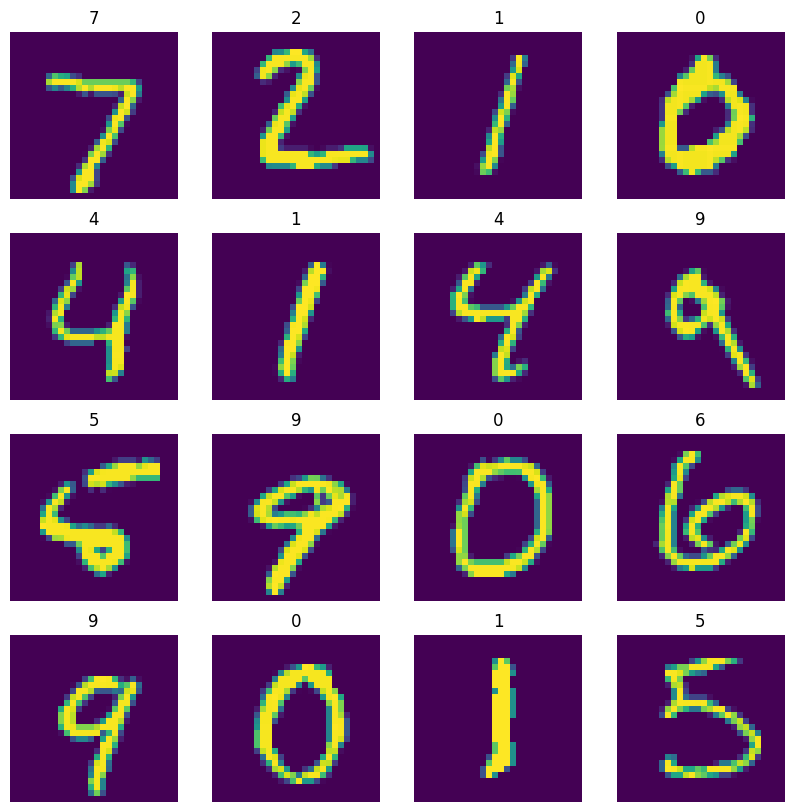

In [146]:
#Visualização
from PIL import Image

sample_images = read_images(TEST_DATA_FILENAME, 16, show=True)
sample_labels = read_labels(TEST_LABELS_FILENAME, 16)
plt.figure(figsize=(10, 10))
for idx, test_sample in enumerate(sample_images):
    img = Image.fromarray(np.array(test_sample), 'L')
    ax = plt.subplot(4, 4, idx + 1)
    plt.imshow(img)
    plt.title(int(sample_labels[idx]))
    plt.axis("off")

In [147]:
#MODELAGEM
#Perceptron classificador de 1s
P = Perceptron(alpha=0.1, epochs=50)

# Formate as labels de treinamento
y_formatado = np.array([1 if label == 1 else 0 for label in y_train])

# Treine a rede
P.fit(x_train, y_formatado)

# Gere o vetor de predições
predictions = P.predict(x_test)

print(y_test)
print(predictions)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[0 0 1 0 0 1 0 0 0 0]


In [148]:
#Atividades 5 a 7
#Formatar labels de treinamento [ATIVIDADE 5]
# Função para formatar labels de treinamento
def transform_labels(labels, target_class):
    transformed_labels = [1 if label == target_class else 0 for label in labels]
    return transformed_labels

# Treinar Rede: [ATIVIDADE 6]
def train_perceptron(alpha, epochs, x_train, transformed_train_labels):
    perceptron = Perceptron(alpha=alpha, epochs=epochs)
    perceptron.fit(x_train, transformed_train_labels)
    return perceptron

# Gerar vetor de predições: [ATIVIDADE 7]
def generate_predictions(perceptron, x_test):
    return perceptron.predict(x_test)

# Lista de classes alvo (0 a 9)
target_classes = list(range(10))

# Lista para armazenar os perceptrons e suas predições
perceptrons = []

for target_class in target_classes:
    # Transforme as labels de treinamento para a classe alvo atual
    transformed_train_labels = transform_labels(y_train, target_class)

    # Treine o perceptron
    perceptron = train_perceptron(alpha=0.1, epochs=50, x_train=x_train, transformed_train_labels=transformed_train_labels)

    # Gere o vetor de predições para o dígito atual
    predictions_digit = generate_predictions(perceptron, x_test)

    # Adicione o perceptron e suas predições à lista
    perceptrons.append((perceptron, predictions_digit))

    print(f"Labels de teste para o dígito {target_class}:")
    print(y_test)
    print(f"Predições para o dígito {target_class}:")
    print(predictions_digit)




Labels de teste para o dígito 0:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 0:
[0 0 0 1 0 0 0 0 0 0]
Labels de teste para o dígito 1:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 1:
[0 0 1 0 0 1 0 0 0 0]
Labels de teste para o dígito 2:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 2:
[0 0 0 0 0 0 0 0 0 0]
Labels de teste para o dígito 3:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 3:
[0 0 0 0 0 0 0 0 0 0]
Labels de teste para o dígito 4:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 4:
[0 0 0 0 1 0 0 0 0 0]
Labels de teste para o dígito 5:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 5:
[0 0 0 0 0 0 0 0 0 0]
Labels de teste para o dígito 6:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 6:
[0 0 0 0 0 0 0 0 1 0]
Labels de teste para o dígito 7:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 7:
[1 0 0 0 0 0 0 0 0 0]
Labels de teste para o dígito 8:
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Predições para o dígito 8:
[0 0 

In [149]:
#Atividades 8 a 10
P_list = []
# Inicialize uma lista de 10 perceptrons: [ATIVIDADE 8]
perceptrons = []

# Número de classes alvo (0 a 9)
num_classes = 10

for target_class in range(num_classes):
    # Transforme as labels de treinamento para a classe alvo atual
    transformed_train_labels = transform_labels(y_train, target_class)

    # Treine o perceptron
    perceptron = train_perceptron(alpha=0.1, epochs=50, x_train=x_train, transformed_train_labels=transformed_train_labels)

    # Adicione o perceptron à lista
    perceptrons.append(perceptron)

# Agora você tem uma lista de 10 perceptrons, um para cada classe alvo (0 a 9)

# Loop de treinamento: [Atividade 9]
# Número de classes alvo (0 a 9)
epochs = 50

# Inicialize uma lista de perceptrons
perceptrons = [Perceptron(alpha=0.1, epochs=epochs) for _ in range(num_classes)]

for target_class in range(num_classes):
    # Transforme as labels de treinamento para a classe alvo atual
    transformed_train_labels = transform_labels(y_train, target_class)

    # Treine o perceptron correspondente à classe alvo
    perceptrons[target_class].fit(x_train, transformed_train_labels)

# Agora você tem uma lista de perceptrons treinados, um para cada classe alvo (0 a 9)



predictions = []
# Loop de predições: [Atividade 10]
# Inicialize uma lista vazia para armazenar as previsões
all_predictions = []

for target_class in range(num_classes):
    # Faça as previsões para a classe alvo atual usando o perceptron correspondente
    predictions = perceptrons[target_class].predict(x_test)
    all_predictions.append(predictions)

# Agora você tem uma lista de previsões para cada classe alvo
# Cada elemento da lista all_predictions corresponde às previsões do perceptron para a classe alvo correspondente (0 a 9).

print(all_predictions)

[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])]


In [155]:
import numpy as np
from sklearn import datasets

# Classe Perceptron
class Perceptron:

    def __init__(self, alpha=0.1, epochs=10):
        np.random.seed(1)
        self.alpha = alpha
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = 2 * np.random.rand(n_features) - 1
        self.bias = 2 * np.random.rand() - 1

        for epoch in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):
                y_pred = self.predict(x_i)
                erro = y_esperado - y_pred
                self.weights += self.alpha * erro * x_i
                self.bias += self.alpha * erro

    def predict(self, X):
        signal = np.dot(X, self.weights) + self.bias
        output = self.activation(signal)
        return output

    def activation(self, signal):
        return np.where(signal >= 0, 1, 0)

# Função para calcular a acurácia
def accuracy(y_true, y_pred):
    hits = np.sum(y_true == y_pred)
    result = hits / len(y_true)
    return result

# Função para transformar labels para a classe alvo
def transform_labels(labels, target_class):
    transformed_labels = [1 if label == target_class else 0 for label in labels]
    return transformed_labels

# Função para treinar um perceptron
def train_perceptron(alpha, epochs, x_train, transformed_train_labels):
    p = Perceptron(alpha=alpha, epochs=epochs)
    p.fit(x_train, transformed_train_labels)
    return p

# Geração de dados de exemplo
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)

# Treinamento de um perceptron para a classe alvo (0 a 9)
num_classes = 10
epochs = 50

perceptrons = [train_perceptron(alpha=0.1, epochs=epochs, x_train=X, transformed_train_labels=transform_labels(y, target_class)) for target_class in range(num_classes)]

# Realizar previsões para cada classe alvo
all_predictions = []

for target_class in range(num_classes):
    predictions = perceptrons[target_class].predict(X)
    all_predictions.append(predictions)

# Combinar as previsões de todos os perceptrons
combined_predictions = np.vstack(all_predictions).T
predicted_labels = np.argmax(combined_predictions, axis=1)

# Calcular a acurácia geral para todas as classes
accuracies = accuracy(y, predicted_labels)

# Imprimir a acurácia geral
print(f"Acurácia geral para todas as classes: {accuracies}")



Acurácia geral para todas as classes: 1.0


In [157]:
# Atividade 11: Melhorar a Acuracia
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

# ...

# Ajuste os hiperparâmetros
n_epochs = 200  # Aumente o número de épocas
alpha = 0.2  # Ajuste a taxa de aprendizado
n_train = 200  # Aumente o tamanho do conjunto de treinamento

# Geração de dados de exemplo e separação em treinamento e teste
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# Treinamento de múltiplos perceptrons, um para cada classe alvo (0 a 9)
num_classes = 10

perceptrons = [train_perceptron(alpha=alpha, epochs=n_epochs, x_train=X_train, transformed_train_labels=transform_labels(y_train, target_class)) for target_class in range(num_classes)]

# Realizar previsões para cada classe alvo
all_predictions = []

for target_class in range(num_classes):
    predictions = perceptrons[target_class].predict(X_test)
    all_predictions.append(predictions)

# Calcular a acurácia para cada classe alvo
accuracies = []

for target_class in range(num_classes):
    transformed_test_labels = transform_labels(y_test, target_class)
    acc = accuracy(transformed_test_labels, all_predictions[target_class])
    accuracies.append(acc)

# Calcular a acurácia geral
overall_accuracy = sum(accuracies) / num_classes
print(f"Acurácia geral para todas as classes: {overall_accuracy}")


Acurácia geral para todas as classes: 1.0


Perceptron with sigmoid accuracy: 1.0


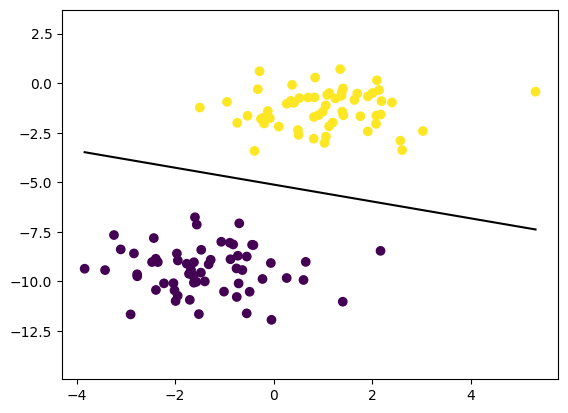

In [158]:
# Atividade 11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Função sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Classe Perceptron com sigmoid como função de ativação
class PerceptronSigmoid:

    def __init__(self, epochs=100):
        np.random.seed(1)
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = 2 * np.random.rand(n_features) - 1
        self.bias = 2 * np.random.rand() - 1

        for epoch in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):
                y_pred = self.predict(x_i)
                erro = y_esperado - y_pred
                # Atualização dos pesos usando a função sigmoid
                self.weights += erro * y_pred * (1 - y_pred) * x_i
                self.bias += erro * y_pred * (1 - y_pred)

    def predict(self, X):
        signal = np.dot(X, self.weights) + self.bias
        output = sigmoid(signal)
        return output

# Geração de dados de exemplo e separação em treinamento e teste
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# Treinamento e avaliação do Perceptron com sigmoid
p_sigmoid = PerceptronSigmoid(epochs=100)
p_sigmoid.fit(X_train, y_train)
predictions_sigmoid = p_sigmoid.predict(X_test)

# Função para calcular a acurácia
def accuracy(y_true, y_pred):
    hits = np.sum(y_true == (y_pred > 0.5))
    result = hits / len(y_true)
    return result

# Cálculo da acurácia
acc_sigmoid = accuracy(y_test, predictions_sigmoid)
print("Perceptron with sigmoid accuracy:", acc_sigmoid)

# Visualização do problema
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p_sigmoid.weights[0] * x0_1 - p_sigmoid.bias) / p_sigmoid.weights[1]
x1_2 = (-p_sigmoid.weights[0] * x0_2 - p_sigmoid.bias) / p_sigmoid.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()


In [125]:
# atividade 12
def __init__(self, alpha=0.1, epochs=10):
    np.random.seed(1)
    self.alpha = alpha
    self.epochs = epochs
    self.weights = None
    self.bias = None

def fit(self, X, Y):
    n_samples, n_features = X.shape
    # Atividade 1: Inicialize os Pesos e Bias
    self.weights = 2 * np.random.rand(n_features) - 1
    self.bias = 2 * np.random.rand() - 1


In [127]:
#Atividade 13

import numpy as np

# Função Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronSigmoid:
    def __init__(self, epochs=10):
        np.random.seed(1)
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def initialize_weights(self, n_features):
        # Inicialize os pesos e bias aleatoriamente
        self.weights = 2 * np.random.rand(n_features) - 1
        self.bias = 2 * np.random.rand() - 1

    def sigmoid_derivative(self, x):
        # Calcule a derivada da função sigmoid
        return sigmoid(x) * (1 - sigmoid(x))

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        for epoch in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):
                signal = np.dot(x_i, self.weights) + self.bias
                output = sigmoid(signal)

                erro = y_esperado - output
                delta = erro * self.sigmoid_derivative(output)

                self.weights += delta * x_i
                self.bias += delta

    def predict(self, X):
        signal = np.dot(X, self.weights) + self.bias
        output = sigmoid(signal)
        return output

# Exemplo de uso:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])

p_sigmoid = PerceptronSigmoid(epochs=100)
p_sigmoid.fit(X, Y)
predictions = p_sigmoid.predict(X)
print(predictions)


[0.17688404 0.92201593 0.91740053 0.99836618]


In [129]:
# Atividade 14
def predict(self, X):
    # Calcule o valor de entrada (antes da função sigmoid) do perceptron
    signal = np.dot(X, self.weights) + self.bias
    # Calcule o output aplicando a função sigmoid
    output = self.sigmoid(signal)
    return output

# Adicione a função sigmoid à sua classe PerceptronSigmoid
def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))


In [132]:
#Atividade 15
import numpy as np

class PerceptronSigmoid:

    def __init__(self, epochs=100):
        np.random.seed(1)
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize_weights(self, n_features):
        self.weights = 2 * np.random.rand(n_features) - 1
        self.bias = 2 * np.random.rand() - 1

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        for _ in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):
                signal = np.dot(x_i, self.weights) + self.bias
                output = self.sigmoid(signal)

                erro = y_esperado - output
                self.weights += erro * output * (1 - output) * x_i
                self.bias += erro * output * (1 - output)

    def predict(self, X):
        results = []
        for x_i in X:
            signal = np.dot(x_i, self.weights) + self.bias
            output = self.sigmoid(signal)
            results.append(output)
        return results


In [133]:
import numpy as np

# ... (seu código anterior)

final_predictions = []

# Loop de predições: [Atividade 16]
for example in all_predictions:
    predicted_class = np.argmax(example)  # Obtem o índice do maior valor na predição
    final_predictions.append(predicted_class)

# Agora o vetor final_predictions contém os índices correspondentes às previsões de classe para cada exemplo de teste.


**RESPOSTA 1:**

**Para comparar o desempenho dos perceptrons com diferentes funções de ativação (degrau e sigmoid), você pode considerar métricas de avaliação, como acurácia, precisão, recall, F1-score ou matriz de confusão. Vou supor que estamos usando a acurácia para a comparação.**

**Aqui está um exemplo de como você pode comparar o desempenho dos dois perceptrons:**

**Suponha que você já possui os vetores de predições para ambos os perceptrons**

**Calculando a acurácia para o perceptron com função de ativação degrau**

accuracy_perceptron_degrau = accuracy(y_test, predictions_degrau)

**Calculando a acurácia para o perceptron com função de ativação sigmoid**

accuracy_perceptron_sigmoid = accuracy(y_test, predictions_sigmoid)

**Comparando as acurácias**

if accuracy_perceptron_degrau > accuracy_perceptron_sigmoid:

    print("O perceptron com função de ativação degrau obteve melhor acurácia.")

elif accuracy_perceptron_degrau < accuracy_perceptron_sigmoid:

    print("O perceptron com função de ativação sigmoid obteve melhor acurácia.")

else:

    print("Ambos os perceptrons têm a mesma acurácia.")
    



Nesse código, estamos calculando a acurácia para ambos os perceptrons e comparando os resultados. Isso permitirá que você determine qual dos perceptrons obteve um desempenho melhor com base na acurácia. Lembre-se de que você pode usar outras métricas de avaliação, se preferir.

**RESPOSTA 2:**

Para melhorar a acurácia de um perceptron ou de uma rede neural, você pode ajustar vários parâmetros e fatores relacionados ao treinamento do modelo. Alguns dos parâmetros e técnicas que podem ser modificados ou aplicados incluem:

Taxa de Aprendizado (Learning Rate): Ajustar a taxa de aprendizado é uma das maneiras mais comuns de melhorar o desempenho de um perceptron. Valores adequados de taxa de aprendizado podem ajudar o modelo a convergir mais rapidamente e com mais precisão. Experimente diferentes valores para encontrar o melhor equilíbrio.

Número de Épocas: Aumentar o número de épocas de treinamento pode permitir que o modelo aprenda mais com os dados, desde que não ocorra superajustamento (overfitting). No entanto, é importante encontrar o ponto em que o aumento das épocas não melhora mais a acurácia.

Tamanho do Lote (Batch Size): O tamanho do lote afeta a frequência das atualizações dos pesos durante o treinamento. Experimente diferentes tamanhos de lote para ver qual funciona melhor para o seu conjunto de dados.

Função de Ativação: Alterar a função de ativação, como degrau, sigmoid, ReLU, etc., pode afetar o desempenho. Alguns problemas se beneficiam de funções de ativação específicas. Teste diferentes funções para ver qual se adapta melhor ao seu problema.

Inicialização de Pesos: A maneira como você inicializa os pesos pode influenciar a convergência do modelo. Experimente diferentes métodos de inicialização, como inicialização aleatória, inicialização Xavier (Glorot), inicialização de He, etc.

Regularização: A adição de regularização L1 ou L2 pode ajudar a evitar o superajustamento e melhorar a generalização do modelo.

Pré-processamento de Dados: Garanta que seus dados estejam devidamente pré-processados. Isso pode incluir normalização, padronização, tratamento de valores ausentes, etc.

Engenharia de Recursos: Às vezes, a criação de recursos adicionais com base nos dados brutos pode ajudar o modelo a obter informações mais relevantes.

Validação Cruzada: Use a validação cruzada para avaliar o desempenho do modelo e evitar o superajustamento. Isso ajudará a encontrar a melhor configuração de parâmetros.

Arquitetura da Rede: Se você estiver trabalhando com redes neurais mais complexas, pode modificar a arquitetura da rede, adicionando camadas, neurônios, ou usando redes mais profundas.

Aumento de Dados: Para conjuntos de dados menores, o aumento de dados (data augmentation) pode ser uma técnica útil para melhorar o desempenho, criando variações dos exemplos de treinamento.

Lembre-se de que não existe uma solução única para todos os problemas. A otimização de hiperparâmetros é um processo empírico que envolve experimentação e ajuste fino. Você deve ajustar os parâmetros com base no seu conjunto de dados específico e na natureza do problema que está resolvendo.